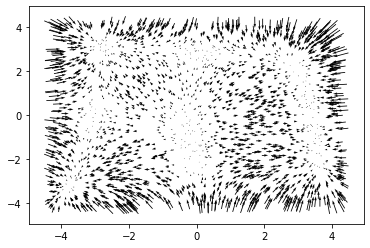

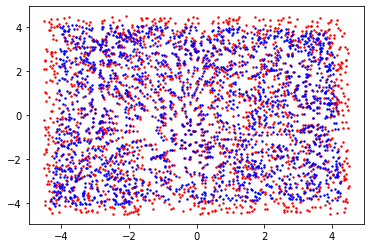

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.linalg import lstsq
from scipy.integrate import solve_ivp
# Open the x0 file and read the data
with open('nonlinear_vectorfield_data_x0.txt', 'r') as file:
    x0_data = []
    for line in file:
        # Split the line into x0 and x1 values and convert them to floats
        x0, x1 = map(float, line.strip().split())
        x0_data.append([x0, x1])

# Open the x1 file and read the data
with open('nonlinear_vectorfield_data_x1.txt', 'r') as file:
    x1_data = []
    for line in file:
        # Split the line into x0 and x1 values and convert them to floats
        x0, x1 = map(float, line.strip().split())
        x1_data.append([x0, x1])

x0_data = np.array(x0_data)
x1_data = np.array(x1_data)


# Plot the vector field
plt.quiver(x0_data[:, 0], x0_data[:, 1], x1_data[:, 0] - x0_data[:, 0], x1_data[:, 1] - x0_data[:, 1], angles='xy', scale_units='xy', scale=1)
plt.show()
# Scatter points
plt.scatter(x0_data[:, 0], x0_data[:, 1], s=2,color='red')
plt.scatter(x1_data[:, 0], x1_data[:, 1], s=2,color='blue')
plt.show()

A = [[-1.00061009  0.0968975 ]
 [-0.02703414 -4.34400169]]


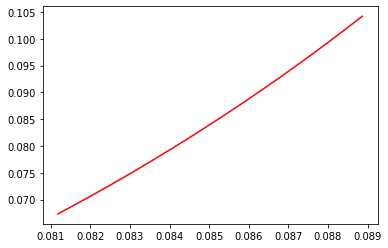

MSE = 11.67872716255854


In [2]:
# Calculate the vectors v(k) using the finite difference formula
v = (x1_data - x0_data) / 0.01

# Use the x0 points as training data and the v vectors as labels
X = x0_data
y = v

# Add a column of ones to the X data to represent the intercept term
X = np.hstack([np.ones((len(X), 1)), X])

# Solve the normal equation to find the coefficients of the linear regression model
coef = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# The matrix A is the coefficients of the model, excluding the intercept term
A = coef[1:]

print('A =', A)

# Define the function that represents the ODE dx/dt = Ax
def ode_function(t, x):
    return A.dot(x)

# Set the initial condition and time range for the ODE solver
t_eval = np.linspace(0, 0.1, 2000)
x0 = np.array(x0_data)
mse = 0
count = 0
best_setup = (np.inf, None)

for x_0s in x0:
    # Solve the ODE and get the solution at the specified time points
    solution = solve_ivp(ode_function, (0, 0.1), x_0s, t_eval=t_eval)

    # Calculate the mean squared error between the solution and the known points x(k)
    count += 1
    new_mse = np.mean((solution.y.T - x1_data)**2)
    if new_mse < best_setup[0]:
        best_setup = (new_mse, solution)
    mse += new_mse


print('MSE =', mse/count)


In [11]:


# Calculate the vectors v(k) using the finite difference formula
v = (x1_data - x0_data) / 0.01

# Use the x0 points as training data and the v vectors as labels
X = x0_data
y = v
best = np.inf
def rbf(x, xl, epsilon):
    return np.exp(-distance.cdist(x,xl) ** 2 / epsilon ** 2)


for i in range(100,1001):
    centers = X[np.random.choice(range(X.shape[0]), replace=False, size=i)]
    
    phi = rbf(X, centers, 5)
    params, residuals, rank, s =lstsq(a=phi, b=y,cond = 0.0001)


    # Mean Squared Error
    
    predicted = phi.dot(params)
    MSE = np.mean((y - predicted) ** 2)
    if MSE < best:
        best = MSE
        best_centers = centers
        print('New Best MSE =', MSE, 'with number of center =', i)
        



New Best MSE = 1.941945572928205 with number of center = 100
New Best MSE = 1.65956694441109 with number of center = 101
New Best MSE = 1.558880577809079 with number of center = 111
New Best MSE = 1.493301855930114 with number of center = 135
New Best MSE = 1.4157947220320373 with number of center = 159
